# **Web Scraping (Skytrax)**

In [54]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as rq

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sn

In [71]:
from PIL import Image

In [55]:
global rating, Aircraft, Class, Travel_type, Route, Date, comfort, staff, food, entertainment, wifi, ground_service, vfm, recommend

verified=[]
rating=[]
feedback=[]
Aircraft=[]
Class=[]
Travel_type=[]
Route=[]
Date=[]
comfort=[]
staff=[]
food=[]
entertainment=[]
wifi=[]
ground_service=[]
vfm=[]
recommend=[]

In [56]:
def value_fetcher(soup):
    rating.append(np.nan)
    Aircraft.append(np.nan)
    Class.append(np.nan)
    Travel_type.append(np.nan)
    Route.append(np.nan)
    Date.append(np.nan)
    comfort.append(np.nan)
    staff.append(np.nan)
    food.append(np.nan)
    entertainment.append(np.nan)
    wifi.append(np.nan)
    ground_service.append(np.nan)
    vfm.append(np.nan)
    recommend.append(np.nan)

    for row in soup.find_all('tr'):
        header=row.find('td',class_='review-rating-header').text
        value=row.find('td',class_='review-value')
        if header=='Aircraft':
            Aircraft[-1]=value.text
        elif header=='Type Of Traveller':
            Travel_type[-1]=value.text
        elif header=='Seat Type':
            Class[-1]=value.text
        elif header=='Route':
            Route[-1]=value.text
        elif header=='Date Flown':
            Date[-1]=value.text
        elif header=='Seat Comfort':
            comfort[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Cabin Staff Service':
            staff[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Food & Beverages':
            food[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Inflight Entertainment':
            entertainment[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Ground Service':
            ground_service[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Value For Money':
            vfm[-1]=len(row.find_all('span',class_='star fill'))
        elif header=='Recommended':
            recommend[-1]=value.text
        elif header=='Wifi & Connectivity':
            wifi[-1]=len(row.find_all('span',class_='star fill'))

In [57]:
def fetcher(soup,tag,key,value):
    if soup.find(tag,{key:value}):
        return soup.find(tag,{key:value}).text
    return np.nan

In [58]:
for i in range(1,364):
    url=f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
    page=rq.get(url).text
    soup=BeautifulSoup(page,'lxml')
    articles= soup.find_all('article',{'itemprop':'review'})
    for article in articles:
        rating.append(fetcher(article,'span','itemprop','ratingValue'))
        div=article.find('div',class_='tc_mobile')
        content=(div.find('div',class_='text_content').text.split('|'))
        if len(content)==2:
            verification,review=content
        else:
            verification =np.nan
            review=content[0]
        verified.append(verification)
        feedback.append(review)
        table=div.find('table',class_='review-ratings')
        value_fetcher(table)

In [60]:
data1=pd.DataFrame({'status':verified,'aircraft':Aircraft,'travel_type':Travel_type,'travel_class':Class,'route':Route,'date':Date,'seating_comfort':comfort,'staff_service':staff,'food_quality':food,'entertainment':entertainment,'wifi':wifi,'ground_service':ground_service,'value_for_money':vfm,'recommended':recommend,'overall_rating':rating[::2],'review':feedback})

In [61]:
data1.to_csv('BA.csv',index=False)

In [63]:
df1 = pd.read_csv('BA.csv')

In [64]:
df1

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,✅ Trip Verified,A320,Business,Business Class,London Heathrow to Malaga,August 2023,2.0,2.0,2.0,NaN,1.0,1.0,2,no,3.0,Chaos at Terminal 5 with BA cancellations a...
1,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1.0,BA cancelled our flight and could not book u...
2,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1.0,When on our way to Heathrow Airport and merel...
3,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8.0,"Nice flight, good crew, very good seat, food ..."
4,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1.0,8 months have passed and still wasting my ti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,3.0,4.0,NaN,NaN,0,yes,6.0,HKG-LHR in New Club World on Boeing 777-300 - ...
3626,NaN,NaN,NaN,Premium Economy,NaN,NaN,4.0,3.0,3.0,4.0,NaN,NaN,4,yes,8.0,YYZ to LHR - July 2012 - I flew overnight in p...
3627,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,3.0,2.0,4.0,NaN,NaN,3,yes,5.0,Flew return in CW from LHR to BKK in August 20...
3628,NaN,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,0.0,NaN,NaN,3,yes,9.0,LHR to HAM. Purser addresses all club passenge...


# **Data Cleaning**

In [35]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

# Esegui la sostituzione di testo in tutte le recensioni
for j in remove_text:
    data['review'] = data['review'].str.replace(j, '')


<ipython-input-35-86543a045e8f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review'] = data['review'].str.replace(j, '')


In [38]:
data.head()

,status,aircraft,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,recommended,overall_rating,review
0,Not Verified,NaN,Couple Leisure,Economy Class,Newark to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1,BA cancelled our flight and could not book u...
1,✅ Trip Verified,NaN,Business,Business Class,London to Johannesburg,August 2023,3.0,2.0,NaN,NaN,NaN,2.0,1,no,1,When on our way to Heathrow Airport and merel...
2,✅ Trip Verified,Boeing 777-300,Couple Leisure,Business Class,LHR to LAX,August 2023,4.0,5.0,3.0,5.0,NaN,5.0,4,yes,8,"Nice flight, good crew, very good seat, food ..."
3,✅ Trip Verified,NaN,Family Leisure,Economy Class,Delhi to Vancouver via London,December 2022,1.0,1.0,NaN,NaN,NaN,1.0,1,no,1,8 months have passed and still wasting my ti...
4,✅ Trip Verified,NaN,Solo Leisure,Economy Class,Copenhagen to London,June 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,1,In June my flight was cancelled within three...


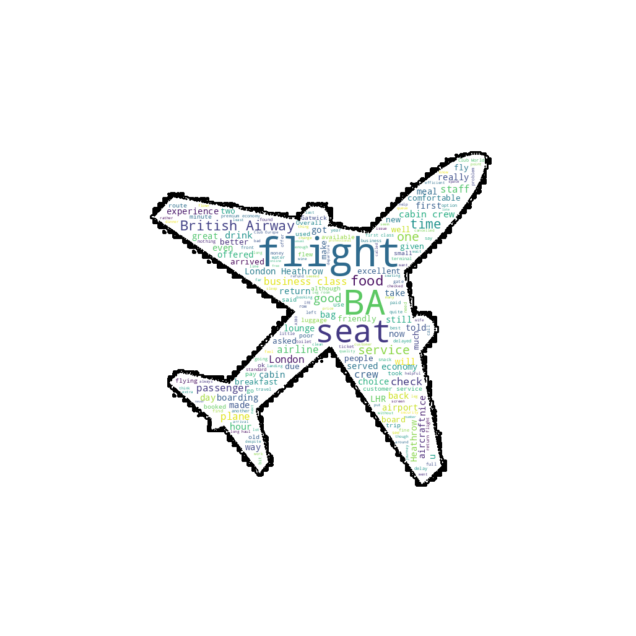

In [88]:
review_word = []

for i in df1['review'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

mask = np.array(Image.open("/content/airplan.jpg"))

wc = WordCloud(width = 1000, height = 450, background_color = 'white',mask = mask, contour_color = 'black', contour_width = 3).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

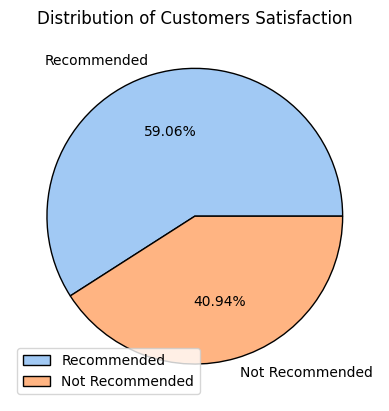

In [100]:
# Calculate the count of recommended and not recommended reviews
oc = df1.groupby('recommended')['review'].count().reset_index()

# Define explicit labels for the chart segments
labels = ['Recommended', 'Not Recommended']

# Create the pie chart
plt.pie(oc['review'], labels=labels, autopct='%.2f%%', colors=sns.color_palette('pastel'),
        wedgeprops={"edgecolor": "k"})

# Add a title to the chart
plt.title('Distribution of Customers Satisfaction')

# Show the legend
plt.legend()

# Show the chart
plt.show()

In [102]:
df1_soc = df1[df1['recommended'] == 'no']
df1_soc.describe()

,seating_comfort,staff_service,food_quality,entertainment,wifi,ground_service,value_for_money,overall_rating
count,2036.000000,2026.000000,1817.000000,1418.000000,420.000000,1758.000000,2144.000000,2139.000000
mean,2.133595,2.430405,1.824986,2.038787,1.457143,2.106940,1.729011,2.485273
std,1.088619,1.285952,1.012136,1.148429,0.909022,1.213633,0.910753,1.598685
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,3.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [104]:
df1['review']

0          Chaos at Terminal 5 with BA cancellations a...
1         BA cancelled our flight and could not book u...
2        When on our way to Heathrow Airport and merel...
3        Nice flight, good crew, very good seat, food ...
4         8 months have passed and still wasting my ti...
                              ...                        
3625    HKG-LHR in New Club World on Boeing 777-300 - ...
3626    YYZ to LHR - July 2012 - I flew overnight in p...
3627    Flew return in CW from LHR to BKK in August 20...
3628    LHR to HAM. Purser addresses all club passenge...
3629    My son who had worked for British Airways urge...
Name: review, Length: 3630, dtype: object

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def token_stop_pos(text):
    doc = nlp(text)
    newlist = []
    for token in doc:
        if not token.is_stop:
            newlist.append(tuple([token.text, token.pos_]))
    return newlist

df1['POS tagged'] = df1['Cleaned Reviews'].apply(token_stop_pos)
df1.head()